# Decision Tree Exercises

Note: To run the decision visualization with graphviz, you need to install pydot and graphviz dependencies  

`
$ conda install pydotplus 
$ conda install graphviz  
`


## 1. Building a regression tree by hand

Your **training data** is a tiny dataset of [used vehicle sale prices](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv). Your goal is to **predict price** for testing data.

1. Read the data into a Pandas DataFrame.
2. Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
3. Decide which feature is the most important predictor, and use that to create your first splitting rule.
    - Only binary splits are allowed.
4. After making your first split, split your DataFrame into two parts, and then explore each part to figure out what other splits to make.
5. Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting.
    - Your goal is to build a model that generalizes well.
    - You are allowed to split on the same variable multiple times!
6. Draw your tree, labeling the leaves with the mean price for the observations in that region.
    - Make sure nothing is backwards: You follow the **left branch** if the rule is true, and the **right branch** if the rule is false.

### Demo: Choosing the ideal cutpoint for a given feature

In [3]:
# vehicle data
import pandas as pd
data = '../../data/vehicles_train.csv' # you may need to change the directory 
train = pd.read_csv(data)

In [4]:
# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.price.mean()
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [5]:
# calculate MSE for those predictions
from sklearn import metrics
import numpy as np
metrics.mean_squared_error(train.price, train.prediction)

35247755.10204081

In [6]:
# define a function that calculates the MSE for a given split of miles
def mileage_split(miles):
    lower_mileage_price = train[train.miles < miles].price.mean()
    higher_mileage_price = train[train.miles >= miles].price.mean()
    train['prediction'] = np.where(train.miles < miles, lower_mileage_price, higher_mileage_price)
    return metrics.mean_squared_error(train.price, train.prediction)

In [7]:
# calculate MSE for tree which splits on miles < 50000
print ('MSE:', mileage_split(50000))
train

MSE: 15872987.012987018


,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,15000.000000
1,14000,2010,30000,2,car,15000.000000
2,13000,2010,73500,4,car,4272.727273
3,9500,2009,78000,4,car,4272.727273
4,9000,2007,47000,4,car,15000.000000
5,4000,2006,124000,2,car,4272.727273
6,3000,2004,177000,4,car,4272.727273
7,2000,2004,209000,4,truck,4272.727273
8,3000,2003,138000,2,car,4272.727273
9,1900,2003,160000,4,car,4272.727273


In [8]:
# calculate MSE for tree which splits on miles < 100000
print ('MSE:', mileage_split(100000))
train

MSE: 12461934.523809522


,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,12083.333333
1,14000,2010,30000,2,car,12083.333333
2,13000,2010,73500,4,car,12083.333333
3,9500,2009,78000,4,car,12083.333333
4,9000,2007,47000,4,car,12083.333333
5,4000,2006,124000,2,car,2437.500000
6,3000,2004,177000,4,car,2437.500000
7,2000,2004,209000,4,truck,2437.500000
8,3000,2003,138000,2,car,2437.500000
9,1900,2003,160000,4,car,2437.500000


In [9]:
# check all possible mileage splits
mileage_range = range(train.miles.min(), train.miles.max(), 1000)
MSE = [mileage_split(miles) for miles in mileage_range]

In [10]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

Text(0,0.5,'MSE (lower is better)')

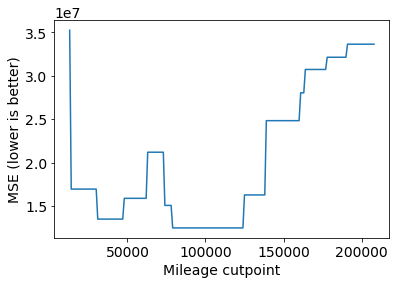

In [11]:
# plot mileage cutpoint (x-axis) versus MSE (y-axis)
plt.plot(mileage_range, MSE)
plt.xlabel('Mileage cutpoint')
plt.ylabel('MSE (lower is better)')

**Recap:** Before every split, this process is repeated for every feature, and the feature and cutpoint that produces the lowest MSE is chosen.

## 2. Building a regression tree in scikit-learn

In [12]:
# encode car as 0 and truck as 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [13]:
# define X and y
feature_cols = ['year', 'miles', 'doors', 'vtype']
X = train[feature_cols]
y = train.price

In [14]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [15]:
# use cross-validation to estimate the MSE for this model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')

np.mean(-scores)

15642142.857142856

## Tuning a regression tree

Let's try to reduce the MSE by tuning the **max_depth** parameter:

In [16]:
# TODO: change the value of max_depth
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(-scores)

32138629.740769893

Or, we could write a loop to try a range of values:

In [17]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average MSE for each value of max_depth
mse_scores = []

# use cross-validation with each value of max_depth
# TODO: write a loop and store the MSE to 'MSE_scores'

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth)
    mse_score = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    mse_scores.append(np.mean(-mse_score))

Text(0,0.5,'MSE (lower is better)')

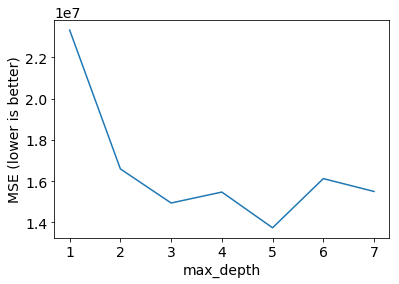

In [18]:
# plot max_depth (x-axis) versus MSE (y-axis)
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE (lower is better)')

Fit a tree with the best value for `max_depth` that you found above.

In [19]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [20]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


## Creating a tree diagram

In [21]:
treereg

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

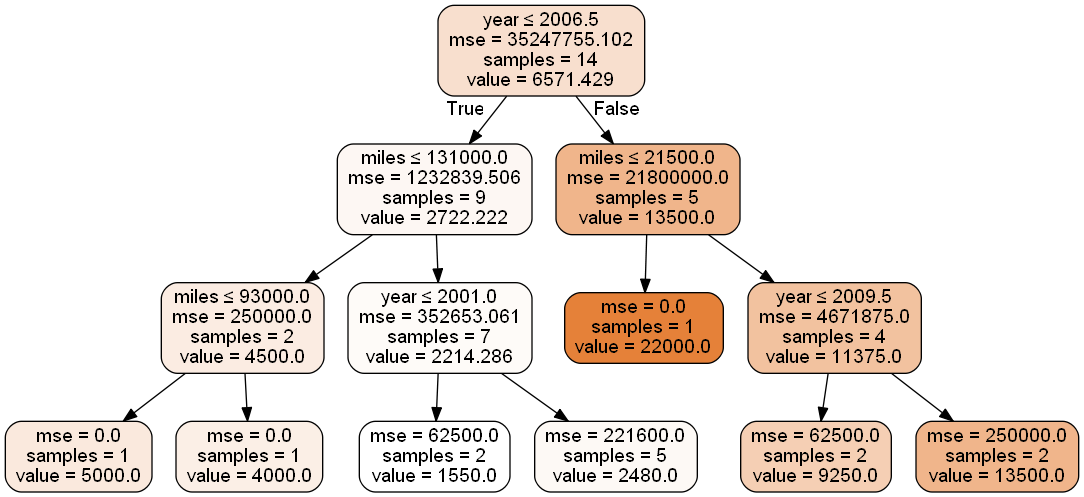

In [22]:
# create a Graphviz file
from sklearn.tree import export_graphviz
from IPython.display import Image
# import StringIO, pydot
%matplotlib inline
import pylab, pydotplus
from sklearn.externals.six import StringIO  


dot_data = StringIO() 
export_graphviz(treereg, 
                out_file=dot_data, 
                feature_names=feature_cols, 
                class_names=['price'],
                filled=True, 
                rounded=True,  
                leaves_parallel=False,
                rotate=False,
                special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("tree_vehicles.pdf")  # this line saves the diagram to a pdf file
Image(graph.create_png())

## Making predictions for the testing data

In [23]:
# read the testing data
vehicles_data = '../../data/vehicles_test.csv'
test = pd.read_csv(vehicles_data)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [24]:
# use fitted model to make predictions on testing data

# TODO: your code here
X_test = test[feature_cols]
y_test = test.price
print(np.array(y_test))
y_pred = treereg.predict(X_test)
print(y_pred)

[ 3000  6000 12000]
[ 4000.  5000. 13500.]


In [25]:
# TODO: calculate MSE
metrics.mean_squared_error(y_test, y_pred)

1416666.6666666667

# 3. Classification trees



### Building a classification tree in scikit-learn

We'll build a classification tree using the Titanic data:

In [26]:
# read in the data
titanic_data = '../../data/titanic.csv'
titanic = pd.read_csv(titanic_data)

# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


- **Survived:** 0=died, 1=survived (response variable)
- **Pclass:** 1=first class, 2=second class, 3=third class
    - What will happen if the tree splits on this feature?
- **Sex:** 0=female, 1=male
- **Age:** numeric value
- **Embarked:** C or Q or S

In [27]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [28]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Visualize the tree.

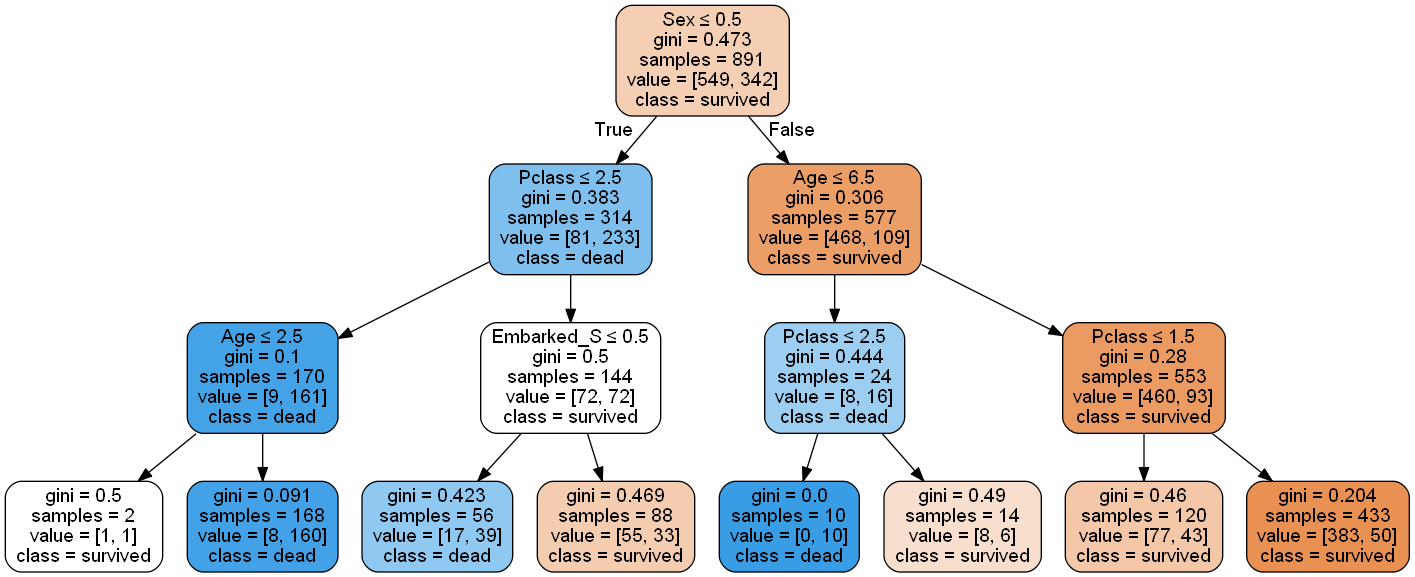

In [29]:
dot_data = StringIO() 
export_graphviz(treeclf, 
                out_file=dot_data, 
                feature_names=feature_cols, 
                class_names=['survived','dead'],
                filled=True, 
                rounded=True,  
                leaves_parallel=False,
                rotate=False,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Notice the split in the bottom right: the **same class** is predicted in both of its leaves. That split didn't affect the **classification error rate**, though it did increase the **node purity**, which is important because it increases the accuracy of our predicted probabilities.

In [30]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258
